# Cleaning and EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

In [2]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


In [4]:
df.isnull().sum()

id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [5]:
# data cleaning
df.dropna(subset=["content", "username", "inferred company", "likes"], inplace=True)

df.fillna({"media": "no_media"}, inplace=True)
df["has_media"] = df["media"].apply(lambda x: x != "no_media")
df["content"] = df["content"].astype(str).str.strip().str.lower()
df["datetime"] = pd.to_datetime(df["date"], errors="coerce")

In [6]:
# eda
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.day_name()
df["word_count"] = df["content"].apply(lambda x: len(x.split()))
df["char_count"] = df["content"].apply(len)

In [7]:
df.to_csv("cleanedData.csv", index=False)  # saving the cleaned dataset

# Plots and Insights

<Axes: xlabel='likes', ylabel='Count'>

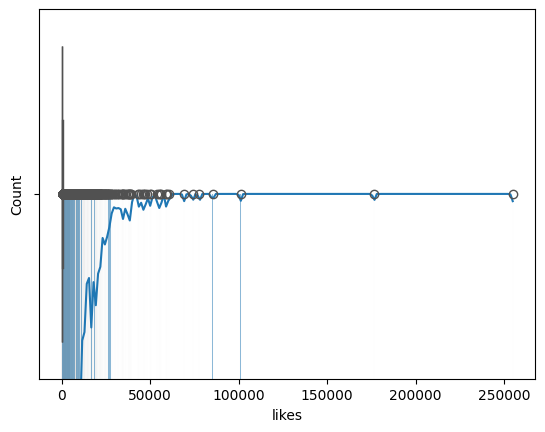

In [8]:
sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

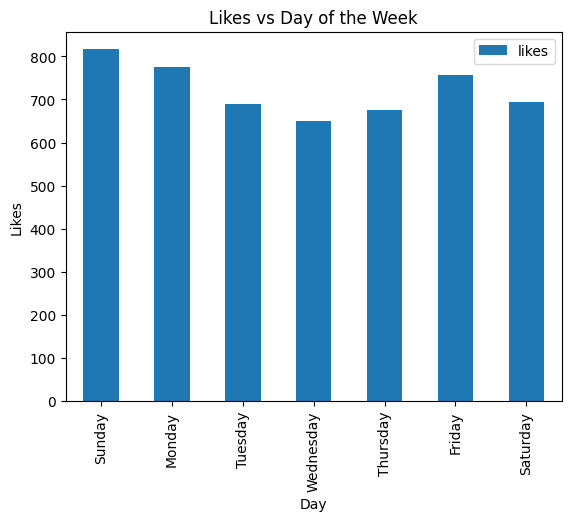

In [9]:
ordered_categories = [
    "Sunday",
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
]
grouped_data = pd.DataFrame(df.groupby(["day_of_week"])["likes"].mean()).reindex(
    ordered_categories
)
grouped_data.plot(kind="bar")
plt.title("Likes vs Day of the Week")
plt.xlabel("Day")
plt.ylabel("Likes")
plt.show()

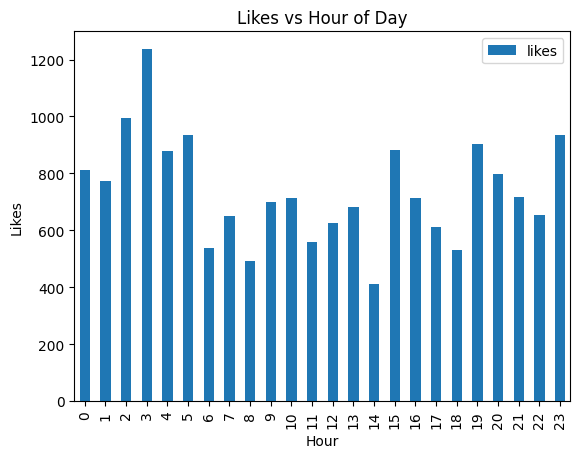

In [10]:
ordered_categories = [x for x in range(24)]
grouped_data = pd.DataFrame(df.groupby(["hour"])["likes"].mean()).reindex(
    ordered_categories
)
grouped_data.plot(kind="bar")
plt.title("Likes vs Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Likes")
plt.show()

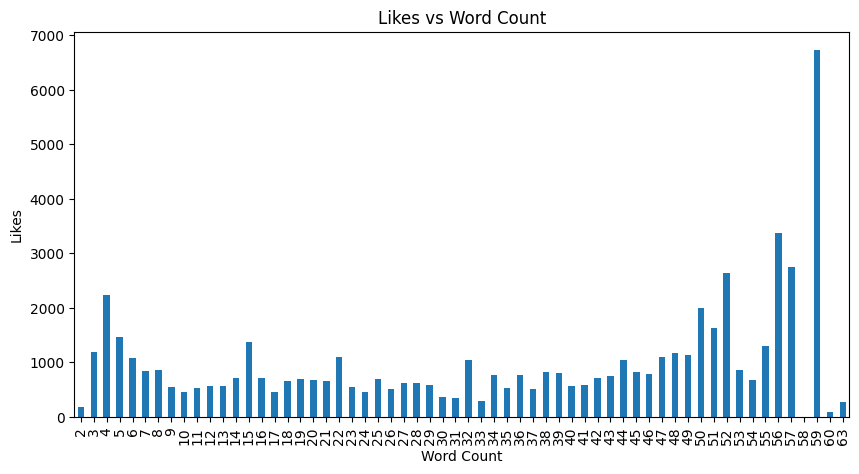

In [11]:
grouped_data = df.groupby(["word_count"])["likes"].mean()
grouped_data.plot(kind="bar", figsize=(10, 5))
plt.title("Likes vs Word Count")
plt.xlabel("Word Count")
plt.ylabel("Likes")
plt.show()

In [12]:
ordered_categories = [True, False]
grouped_data = pd.DataFrame(df.groupby(["has_media"])["likes"].mean()).reindex(
    ordered_categories
)
if pd.isnull(grouped_data.loc[False]["likes"]):
    grouped_data.loc[False, "likes"] = 0
print(f"Effect of media in the tweet:")
print(f"Average likes on posts with media: {grouped_data.loc[True]['likes']}")
print(f"Average likes on posts with no media: {grouped_data.loc[False]['likes']}")

Effect of media in the tweet:
Average likes on posts with media: 718.3921297097686
Average likes on posts with no media: 0.0
